In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn

In [2]:
Magic_Foods = pd.read_csv("C:/Users/GL-FF-CR1/Desktop/Magic Foods.csv")

In [4]:
Magic_Foods.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


# Take subset

In [9]:
Magic_Foods = Magic_Foods.loc[:,['checkout_price',
                                 'base_price',
                                 'emailer_for_promotion',
                                 'homepage_featured',
                                 'num_orders']]

Text(0.5, 1.0, 'Comparison between Checkout Price & Number of Orders')

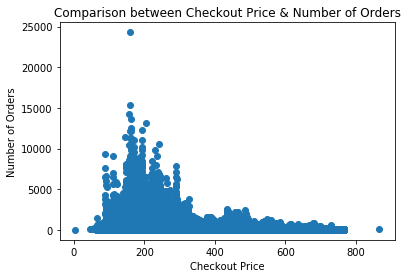

In [12]:
plt.scatter(Magic_Foods['checkout_price'],Magic_Foods['num_orders'])
plt.xlabel('Checkout Price')
plt.ylabel('Number of Orders')
plt.title('Comparison between Checkout Price & Number of Orders')

In [18]:
#surveys_df[surveys_df.year == 2002]

Magic_Foods_300 = Magic_Foods[Magic_Foods.checkout_price<300]

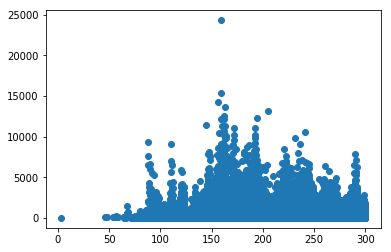

In [19]:
plt.scatter(Magic_Foods_300['checkout_price'], Magic_Foods_300['num_orders'])

In [20]:
#surveys_df[(surveys_df.year >= 1980) & (surveys_df.year <= 1985)]
Magic_Foods_150300 = Magic_Foods[(Magic_Foods.checkout_price >150) & (Magic_Foods.checkout_price<300)] 

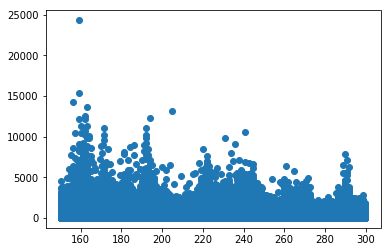

In [22]:
plt.scatter(Magic_Foods_150300['checkout_price'], Magic_Foods_150300['num_orders'])

In [21]:
Magic_Foods_150300.corr()

,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
checkout_price,1.000000,0.775126,-0.041728,-0.017244,-0.111320
base_price,0.775126,1.000000,0.257815,0.216094,0.088826
emailer_for_promotion,-0.041728,0.257815,1.000000,0.399414,0.396416
homepage_featured,-0.017244,0.216094,0.399414,1.000000,0.330017
num_orders,-0.111320,0.088826,0.396416,0.330017,1.000000


In [23]:
Magic_Foods_200 = Magic_Foods[Magic_Foods.checkout_price<200] 

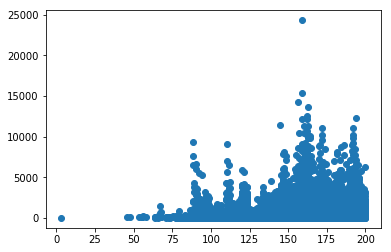

In [24]:
plt.scatter(Magic_Foods_200['checkout_price'], Magic_Foods_200['num_orders'])

In [25]:
Magic_Foods_200.corr()

,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
checkout_price,1.000000,0.599814,0.028911,-0.100273,0.084215
base_price,0.599814,1.000000,0.309152,0.090051,0.189094
emailer_for_promotion,0.028911,0.309152,1.000000,0.276637,0.315136
homepage_featured,-0.100273,0.090051,0.276637,1.000000,0.376775
num_orders,0.084215,0.189094,0.315136,0.376775,1.000000


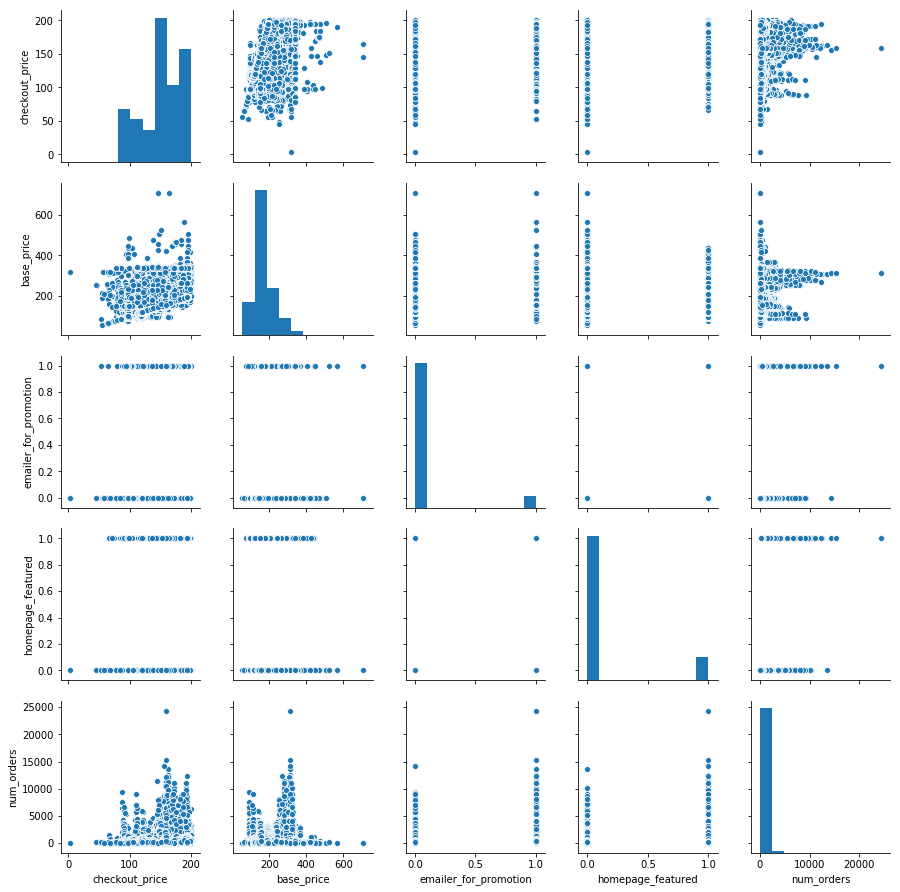

In [27]:
sns.pairplot(Magic_Foods_200)

In [28]:
import scipy
from scipy import stats

X = Magic_Foods_200.loc[:,['checkout_price','base_price','emailer_for_promotion','homepage_featured']].values
y = Magic_Foods_200.loc[:,'num_orders'].values

In [29]:
X,y

(array([[136.83, 152.29,   0.  ,   0.  ],
        [136.83, 135.83,   0.  ,   0.  ],
        [134.86, 135.86,   0.  ,   0.  ],
        ...,
        [159.08, 153.26,   1.  ,   0.  ],
        [197.88, 234.74,   0.  ,   0.  ],
        [193.09, 260.93,   0.  ,   0.  ]]),
 array([177, 270, 189, ..., 378, 312, 123], dtype=int64))

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
from sklearn.linear_model import LinearRegression

Regression_Model = LinearRegression()

Regression_Model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
# Predicting the Test set results
y_predict = Regression_Model.predict(X_test)

In [33]:
y_predict

array([ 354.01701639, 1206.14938466,  338.70815522, ...,  386.45251281,
        369.76786329,  391.49297529])

In [34]:
#Regression Diagnostics
from sklearn.metrics import mean_squared_error, r2_score
Regression_Model.coef_,Regression_Model.intercept_

(array([1.65093114e+00, 4.99152564e-01, 4.59252715e+02, 5.47907480e+02]),
 -19.366519092438864)

# Regression Equation is Number of Orders = -19 + 1.65 * checkout_price + 0.4 *base_price +459 *emailer_for_promotion+547*homepage_featured'

In [36]:
# Rsquare values
Regression_Model.score(X_train,y_train),Regression_Model.score(X_test,y_test),Regression_Model.score(X_test,y_predict)

(0.2027289821129583, 0.20532130487329558, 1.0)

In [37]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predict))

Mean squared error: 286884.40


In [38]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_predict))

Variance score: 0.21


Text(0.5, 1.0, 'Comparision between Actual Orders & Predicted Orders')

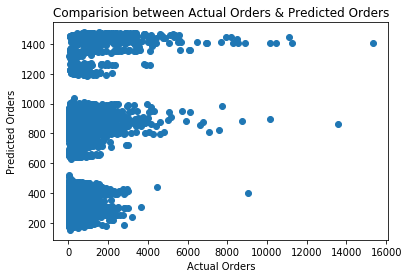

In [39]:
plt.scatter(y_test,y_predict)
plt.xlabel("Actual Orders")
plt.ylabel("Predicted Orders")
plt.title("Comparision between Actual Orders & Predicted Orders")

In [40]:
y_test
y_predict
#--------------------------------------
y_test2 = pd.DataFrame(y_test)

y_pred2 = pd.DataFrame(y_predict)
#----------------------------------------
y_test2.index = y_pred2.index

result = pd.concat((y_test2,y_pred2),join = 'outer', axis=1)

#result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
Result = pd.concat([y_test2,y_pred2],axis=1, join_axes=[y_test2.index])

Result

,0,0
0,203,354.017016
1,1526,1206.149385
2,244,338.708155
3,121,223.598186
4,312,1429.717021
5,418,350.588595
6,135,215.069422
7,14,313.956324
8,1106,293.599664
9,1594,404.953635
